<img style="float: center;" src="..\figures\lacaja.jpg">
### DS Team

Enviroment: Python 3.6.10

In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [1]:
from collections import defaultdict
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import gensim

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import nltk
import pickle
import sys
from tqdm import tqdm
from sklearn import manifold
import time
import gc as gc
import seaborn as sns



start_time = time.time()

%matplotlib inline

from playsound import playsound

C:\Users\paladugu\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import random
random.seed(100)
random_state = 100

In [4]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
from matplotlib import rcParams
import seaborn as sns
import squarify

sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
import warnings
warnings.filterwarnings('ignore')


# cambio el display para observar bien el contenido de las rows
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', -1)

### 0. Carpetas de trabajo

In [4]:
ls

 Volume in drive C is System
 Volume Serial Number is 8032-C235

 Directory of C:\Users\paladugu\Downloads\nps-generalli\nps-generalli\notebooks

05/04/2021  12:23 PM    <DIR>          .
05/04/2021  12:23 PM    <DIR>          ..
05/04/2021  11:53 AM    <DIR>          .ipynb_checkpoints
05/04/2021  12:23 PM           997,858 01-EDA.ipynb
05/04/2021  11:53 AM           331,887 02-preprocessing-text.ipynb
05/04/2021  11:53 AM           200,140 03-LDA-discover-topics.ipynb
01/25/2021  02:49 PM           626,558 04-LDA-optimizado.ipynb
09/24/2020  07:49 PM           149,976 05-WE.ipynb
09/11/2020  10:37 PM           374,784 06-WE-analysis.ipynb
04/08/2021  03:19 PM            99,003 07-implementation.ipynb
03/17/2021  03:21 PM            14,100 HASHEO.ipynb
03/17/2021  03:48 PM                 0 ldaviz-05.txt
               9 File(s)      2,794,306 bytes
               3 Dir(s)  20,294,094,848 bytes free


In [5]:
path_df = "C:/Users/paladugu/Downloads/nps-generalli/nps-generalli/data/original/"
path_processed = "C:/Users/paladugu/Downloads/nps-generalli/nps-generalli/data/processed/"
figures = "C:/Users/paladugu/Downloads/nps-generalli/nps-generalli/figures/"
sonido = "C:/Users/paladugu/Downloads/nps-generalli/nps-generalli/sound/"
sys.path.append("C:/Users/paladugu/Downloads/nps-generalli/nps-generalli/source")

# 1. Dataset
### Limpieza del dataset

In [6]:
df_2020 = pd.read_csv(path_df +"nps_enero2019_febrero_2021.csv",error_bad_lines=False,  encoding='ISO-8859-1', sep=';')
print(f"Size of Dataset: {df_2020.shape}")

Size of Dataset: (125605, 176)


In [7]:
df_2020.head(3).T

,0,1,2
CREATION_DATE,5/12/2018 10:30:04,5/12/2018 10:30:04,6/12/2018 10:30:04
RESPONSE_DATE,2/1/2019 15:46:19,3/1/2019 12:54:57,4/1/2019 12:35:15
CURRENT_STATUS,Resolved,NaN,Closed
ALL_LOG_NOTES_COMBINED,[2019-01-02 10:46:48] Alert Created: Detractor Consumer: AR; [2019-01-02 10:46:50] Alert status set to New; [2019-01-03 03:32:08] Case Edited: Dueño de este caso (por favor ingresar su nombre) · Fecha del Primer contacto · Hora del Primer contacto · Resultado del Primer contacto · Agenda de próximo contacto (araujo); [2019-01-03 03:59:07] Case Edited: Date of 2nd Feedback Call · Time of 2nd Feedback Call · Outcome of 2nd Feedback Call (araujo); [2019-01-03 04:17:49] Case Edited: Date of 3rd Feedback Call · Time of 3rd Feedback Call · Outcome of 3rd Feedback Call · Descripción detallada del contacto (araujo); [2019-01-03 08:05:51] Case Edited: Descripción detallada del contacto · Fuiste capaz de resolver el inconveniente? · El cliente se encontró satisfecho con el resultado? · Hay riesgos de que el cliente solicite la baja de su póliza? · El cliente desea ser contactado por un representante de Generali? · El cliente recibirá un regalo sorpresa? · Plan de acción para la resolución (araujo); [2019-01-03 08:05:57] Alert Closed (araujo); [2019-01-03 08:06:47] Note Added: 3 intentos de contacto fallidos. se envía mail para una próxima llamada. 5TA LLAMADA SIN EXITO. SE RE ENVIA MAIL DONDE SE LE SOLICITA PEDIR BAJA DEL SEGURO DE AP para dar curso al trámite (araujo); [2019-05-21 04:18:02] Alert Reopened (araujo); [2019-05-21 04:18:06] Alert Resolved (araujo); [2019-05-21 04:18:23] Alert Closed (araujo); [2019-05-21 06:43:03] Alert Reopened (araujo); [2019-05-21 06:43:36] Case Edited: Descripción detallada del contacto · Fuiste capaz de resolver el inconveniente? · El cliente se encontró satisfecho con el resultado? · Hay riesgos de que el cliente solicite la baja de su póliza? · El cliente desea ser contactado por un representante de Generali? · El cliente recibirá un regalo sorpresa? · Plan de acción para la resolución (araujo); [2019-05-21 06:43:42] Alert Resolved (araujo); [2019-05-21 06:43:54] Alert Closed (araujo); [2019-05-21 06:44:00] Alert Reopened (araujo); [2019-05-21 06:44:04] Alert Resolved (araujo),NaN,[2019-01-04 07:35:23] Alert Created: Promoter Autoclose: AR; [2019-01-04 07:35:25] Alert Closed
ALERT_STATUS_CHANGED_TIME,21/5/2019 06:44:04,NaN,4/1/2019 07:35:25
CASE_OWNER,vanni gorostiza,NaN,NaN
FEEDBACK_CALL_DATE,3/1/2019,NaN,NaN
FEEDBACK_CALL_TIME,1/12/2019 08:30:00,NaN,NaN
FEEDBACK_CALL_OUTCOME,Not reachable,NaN,NaN
APPOINTMENT_FOR_NEXT_CALL,03/01/2019,NaN,NaN


In [8]:
len(df_2020[df_2020.QUERY_SERVICING_DESCRIPTION.isnull()])/len(df_2020)

0.7513474782054854

In [9]:
len(df_2020[df_2020.QUERY_SERVICING_OBSERVATIONS.isnull()])/len(df_2020)

0.817738147366745

In [10]:
df_2020.QUERY_SERVICING_DESCRIPTION.unique()

array([nan, 'Endoso automotor', 'Consulta General de Póliza',
       'Consulta Débitos / Cuotas/Facturación', 'Info Pago Cuota',
       'Consulta Docu para Circular',
       'Adhesión alta envió de renovación por mail',
       'Campaña Call Back - Cliente Contactado',
       'E-Mail At.Clientes - Consulta / Gestión Modificaciones de Pza',
       'E-Mail At.Clientes - Consulta Débitos / Cuota',
       'Autogestion Web / Cambio Forma Cobro', 'Dudas Coberturas',
       'E-Mail At.Clientes - Consulta Cobertura',
       'Autogestion Web / Endoso Patente E/T',
       'WhatsApp - Consulta por Baja de Pza/Sol',
       'WhatsApp - Consulta Débitos / Cuota',
       'Chat - Consulta Débitos / Cuota', 'WhatsApp - Consultas Varias',
       'WhatsApp - Consulta Cobertura',
       'WhatsApp - Consulta / Gestión Modificaciones de Pza',
       'Chat - Consultas Varias', 'Chat - Consulta por Baja de Pza/Sol',
       'WhatsApp - Consulta o Carga de Reclamos/Quejas',
       'Chat - Consulta Cobertura',
  

In [11]:
list(df_2020)

['CREATION_DATE',
 'RESPONSE_DATE',
 'CURRENT_STATUS',
 'ALL_LOG_NOTES_COMBINED',
 'ALERT_STATUS_CHANGED_TIME',
 'CASE_OWNER',
 'FEEDBACK_CALL_DATE',
 'FEEDBACK_CALL_TIME',
 'FEEDBACK_CALL_OUTCOME',
 'APPOINTMENT_FOR_NEXT_CALL',
 'FEEDBACK_CALL_CATEGORY',
 'DETAILED_DESCRIPTION_ISSUE',
 'ABLE_TO_RESOLVE_ISSUE',
 'CUSTOMER_SATISFIED_OUTCOME',
 'RISK_CHURN',
 'CUSTOMER_WISH_RECONTACTED',
 'CUSTOMER_RECEIVE_GIFT',
 'ACTION_PLAN_RESOLUTION',
 'ACTION_OTHER_DEPARTMENT',
 'TITLE',
 'DOCUMENT_TYPE',
 'DOCUMENT_NUMBER',
 'FIRST_NAME',
 'LAST_NAME',
 'GENDER',
 'DAY_OF_BIRTH',
 'EMAIL',
 'BEST_PHONE',
 'BEST_CELLPHONE',
 'CIF_ID',
 'AGE',
 'PRINCIPAL_ADDRESS',
 'LOCATION',
 'POSTAL_CODE',
 'TOUCHPOINT_NUMBER',
 'CASE_NUMBER',
 'CASE_DATE',
 'CASE_CHANNEL',
 'POLICY_NUMBER',
 'PRODUCT_NAME',
 'POLICY_COMPANY',
 'POLICY_SECTION',
 'POLICY_BRANCH',
 'POLICY_SALES_CHANNEL',
 'UNIT',
 'UNIT_TYPE',
 'CONTRACT_START',
 'SALES_CHANNEL',
 'POLICY_POSTAL_CODE',
 'INSPECTION_CHANNEL',
 'QUERY_SERVICING_ID

#### Missing Data
I keep the columns that have more than 50% missing data

In [12]:
limitPer = len(df_2020) * .5
df = df_2020.dropna(thresh=limitPer,axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125605 entries, 0 to 125604
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CREATION_DATE              125605 non-null  object 
 1   RESPONSE_DATE              125605 non-null  object 
 2   CURRENT_STATUS             98771 non-null   object 
 3   ALL_LOG_NOTES_COMBINED     108857 non-null  object 
 4   ALERT_STATUS_CHANGED_TIME  98771 non-null   object 
 5   TITLE                      125605 non-null  object 
 6   DOCUMENT_TYPE              125605 non-null  object 
 7   DOCUMENT_NUMBER            125605 non-null  int64  
 8   FIRST_NAME                 125124 non-null  object 
 9   LAST_NAME                  125602 non-null  object 
 10  GENDER                     125035 non-null  object 
 11  DAY_OF_BIRTH               124994 non-null  object 
 12  EMAIL                      125605 non-null  object 
 13  BEST_PHONE                 94

# 2. Pre-process

## Dates and customers
### Cat by score

*Detractor, Promotor, Neutro*

In [14]:
df["TNPS_SCORE"].describe()

count    125605.000000
mean     8.149532     
std      2.707780     
min      0.000000     
25%      8.000000     
50%      9.000000     
75%      10.000000    
max      10.000000    
Name: TNPS_SCORE, dtype: float64

### Columnas Fecha

In [15]:
df.CREATION_DATE = pd.to_datetime(df.CREATION_DATE)
df.CREATION_DATE.max()

Timestamp('2021-12-01 10:30:03')

In [16]:
df.CASE_DATE.max()

'9/9/2020'

In [17]:
df.CASE_DATE.min()

'1/1/2019'

Creamos columnas de mes y de año

In [18]:
df.CASE_DATE = pd.to_datetime(df.CASE_DATE,errors = 'coerce', format = '%d/%m/%Y')
df["mes"] = df.CASE_DATE.dt.month

In [19]:
df["año"] = df.CASE_DATE.dt.year

In [20]:
len(df[df.año == 2020])

62121

In [21]:
df.CASE_DATE = pd.to_datetime(df.CASE_DATE,errors = 'coerce', format = '%d/%m/%Y')
df["mes"] = df.CASE_DATE.dt.month
df["año"] = df.CASE_DATE.dt.year
df = df[df.año == 2020]

In [22]:
# Filtro sólo para el 2020
df = df[df.año == 2020]

In [23]:
df["mes"] = df.CASE_DATE.dt.month

In [24]:
df.RESPONSE_DATE.max()

'9/9/2020 23:41:21'

### Generamos la regla 
### We generate the rule 

**Detractor** : Score <= 6 <br>
**Neutro** :  7 <= Score <= 8  <br>
**Promotor** :  9 <= Score <= 10

In [25]:
df.categoria = ""

In [26]:
lst = [df]
for column in lst:
    column.loc[column["TNPS_SCORE"] <= 6,  'categoria'] = "detractor"
    column.loc[(column["TNPS_SCORE"] >= 7) & (column["TNPS_SCORE"] <= 8), 'categoria'] = "neutro"
    column.loc[(column["TNPS_SCORE"] >= 9), 'categoria'] = "promotor"


In [27]:
del column
del lst

# 3. Exploración de los datos (Exploring the data)
### A. Distribución de la categoría de clientes (Customer category distribution)

In [28]:
df.memory_usage(deep=True).sum()

139574624

In [29]:
detract = len(df[df['categoria']=='detractor'])
promo = len(df[df['categoria']=='promotor'])
neutro = len(df[df['categoria']=='neutro'])

detract+promo+neutro

62121

** Cantidad de detractores **

In [30]:
detract

11093

** Cantidad de promotores **

In [31]:
promo

37537

** Cantidad de neutros **

In [32]:
neutro

13491

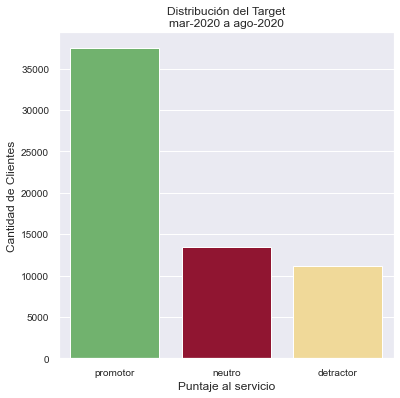

Porcentajes de Promotores de la muestra: 60.42562096553501
Porcentajes de Detractores de la muestra 17.857085365657348
Porcentajes de Neutros de la muestra 21.71729366880765


In [33]:
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63","#a50026","#fee08b"]

df['categoria'].value_counts()
sns.countplot(x='categoria', data=df, palette=paleta, order = df['categoria'].value_counts().index)
plt.xlabel("Puntaje al servicio") 
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución del Target\nmar-2020 a ago-2020")  
plt.show()

detract = len(df[df['categoria']=='detractor'])
promo = len(df[df['categoria']=='promotor'])
neutro = len(df[df['categoria']=='neutro'])

porciento_detractor =( detract/(detract+promo+neutro) * 100)
porciento_promotor= (promo /(detract+promo+neutro) * 100)
porciento_neutro= (neutro /(detract+promo+neutro) * 100)

print('Porcentajes de Promotores de la muestra:', porciento_promotor)
print('Porcentajes de Detractores de la muestra', porciento_detractor)
print('Porcentajes de Neutros de la muestra', porciento_neutro)

### Customer value
Obtengo mayor detalle y chequeo cantidad de clientes según categoría y según valor del cliente
(I get more detail and check the number of customers according to category and customer value)

<AxesSubplot:xlabel='CUSTOMER_VALUE'>

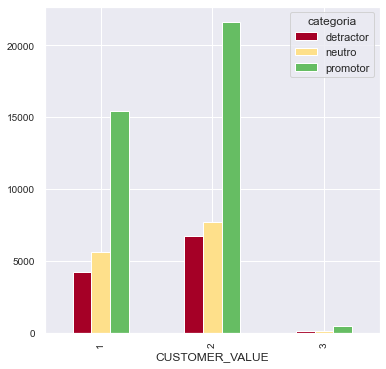

In [34]:
valor =  pd.crosstab(df['CUSTOMER_VALUE'],df['categoria'])
valor[['detractor','neutro',"promotor"]].plot( kind ='bar',color = ("#a50026", "#fee08b","#66bd63"))

In [35]:
df.CUSTOMER_VALUE.unique()

array([1, 2, 3], dtype=int64)

**Customer_value** A priori no es una variable que me va a agregar mucha información. Tengo dos clases y habría que ver cual es el criterio (A priori is not a variable that will add a lot of information to me. I have two classes and it would be necessary to see what is the criterion)

## Timelines categorías
### Genero Frecuencias relativas Mensuales por categoría (Gender Relative Frequencies Monthly by Category)

In [36]:
per_month = pd.crosstab(df['categoria'],df['mes']).apply(lambda x: x/x.sum() * 100)
per_month = per_month.T
per_month

categoria,detractor,neutro,promotor
mes,,,
1,14.541089,21.184632,64.274280
2,14.577371,20.606754,64.815875
3,15.888181,21.903751,62.208068
4,27.739464,21.628352,50.632184
5,21.338127,24.855401,53.806472
6,15.753542,23.758321,60.488138
7,16.482301,22.308260,61.209440
8,16.717499,22.588639,60.693862
9,16.076751,21.218331,62.704918


<AxesSubplot:xlabel='mes'>

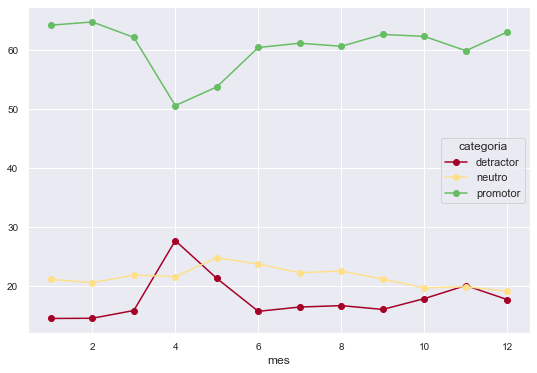

In [37]:
rcParams['figure.figsize'] = 9,6

per_month[['detractor','neutro',"promotor"]].plot( kind ='line', marker = "o",color = ("#a50026", "#fee08b","#66bd63"))

### agrego totales para ver cantidad de clientes por mes (I add totals to see number of customers per month)

In [38]:
crooss_tab_mes = pd.crosstab(df['categoria'],df['mes'])
crooss_tab_mes.loc['Total',:]= crooss_tab_mes.sum(axis=0)
crooss_tab_mes = crooss_tab_mes.T

per_month["total"] = crooss_tab_mes["Total"]

<AxesSubplot:xlabel='mes'>

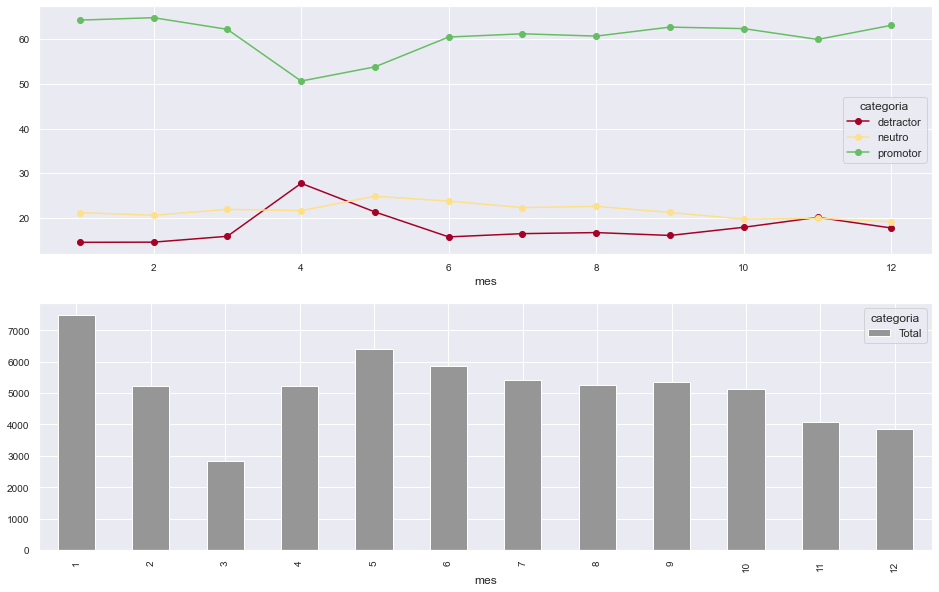

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))
per_month[['detractor','neutro',"promotor"]].plot(ax=axes[0], kind ='line', marker = "o",color = ("#a50026", "#fee08b","#66bd63"))
crooss_tab_mes[['Total']].plot(ax=axes[1],kind ='bar',color = ("#969696"))

En el mes 4 parece haber cierta correlación entre cantidad de encuestas y detractores que  parece existir en los meses siguiente
(In month 4 there seems to be a certain correlation between the number of polls and detractors that seems to exist in the following months)

### B. Columna First Call Resolution

In [42]:
df.FIRST_CALL_RESOLUTION.unique()

array(['Resolved after multiple contacts', 'Resolved on First Contact',
       'Still unresolved', nan], dtype=object)

Las que no sé si fueron resueltas las taggeo cómo unknown (The ones that I do not know if they were solved the tagged as unknown)

In [43]:
df.FIRST_CALL_RESOLUTION = df.FIRST_CALL_RESOLUTION.fillna("unknown")

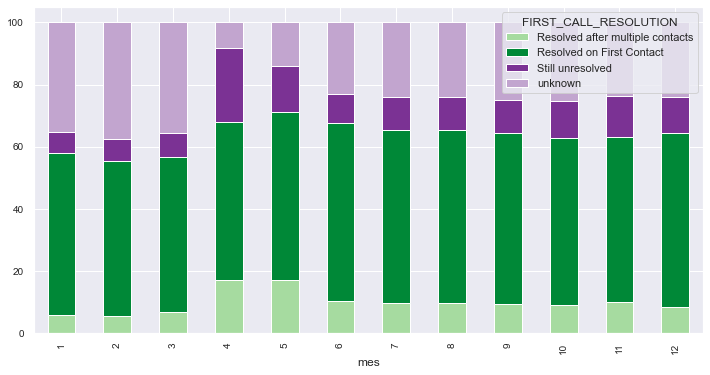

In [44]:

resolucion= pd.crosstab(df['FIRST_CALL_RESOLUTION'],df['mes'])

per_res = resolucion.apply(lambda x: x/x.sum() * 100).T
rcParams['figure.figsize'] = 12,6
ax = per_res[["Resolved after multiple contacts","Resolved on First Contact","Still unresolved", "unknown"
]].plot(kind ='bar', stacked=True,color = ("#a6dba0","#008837","#7b3294", "#c2a5cf"))


In [45]:
comparativo = per_month.merge(per_res, on='mes')

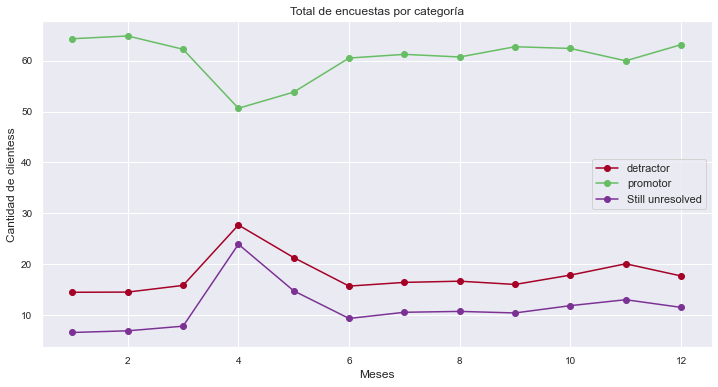

In [46]:
rcParams['figure.figsize'] = 12,6
plot_month = comparativo[['detractor',"promotor","Still unresolved"]].plot(kind ='line',color = ("#a50026", "#66bd63", "#7b3294"),marker = 'o')
plt.title('Total de encuestas por categoría')
plt.ylabel('Cantidad de clientess')
plt.xlabel('Meses')
ticks = np.arange(1,13,1)
#plt.xticks(ticks)
plt.show()

Esta altamente correlacionada la no resolución con la cantidad de detractores, algo totalmente intuitivo y lógico.

Cheque el número de correlación

Non-resolution is highly correlated with the number of detractors, something totally intuitive and logical.

Check the correlation number

In [51]:
column_1 = comparativo["detractor"]
column_2 = comparativo["Still unresolved"]
column_1.corr(column_2)

0.9835140699565963

In [47]:
column_1 = comparativo["detractor"]
column_2 = comparativo["Resolved on First Contact"]
column_1.corr(column_2)

-0.18396579356878878

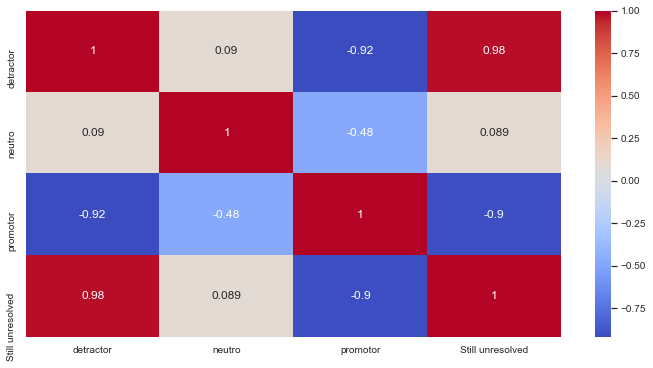

In [53]:
rcParams['figure.figsize'] = 12,6

auto_df = comparativo[['detractor','neutro',"promotor","Still unresolved"]]
corr = auto_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap='coolwarm')

Ser detractor tiene una alta y positiva correlación con la "no resolución", y una alta y negativa correlación con "la resolución en el primer contacto" 
Being a detractor has a high and positive correlation with "non-resolution", and a high and negative correlation with "resolution on first contact"

# Cats


### UNIT_TYPE, CASE_CHANNEL, POLICY_BRANCH

### POLICY_BRANCH:
It´s encoding

In [54]:
df.POLICY_BRANCH.unique()

array([  1, 349, 346, 526, 340,   8,   9], dtype=int64)

### UNIT_TYPE
Podemos ver categorías de interés cómo AUXICAJA y WEB. No llego entender el resto de las CAT.
(We can see categories of interest as AUXICAJA and WEB. I can't understand the rest of the CAT.)

In [55]:
df.UNIT_TYPE.unique()

array(['WAC', 'INTE', 'SUCU', 'WEB', 'CS', 'CORP', 'DGTL', 'ADM',
       'AUXICAJA', 'EUROP', 'SINS', 'WAS', 'SUVI', 'BAOF', 'SUAC', 'SINT',
       'RET', 'SIDG', 'SWA', 'SINI', 'SVCC', 'REC2', 'ACC', 'SUSI',
       'ADCS', 'IVR', 'TMKE'], dtype=object)

### TOUCHPOINT_NUMBER
¿Nos dice algo del puntaje el tipo de contacto? ¿Sólo nos interesan Claims? ¿Que significa la clase mayoritaria Query/Servicing request? (Does the type of contact tell us something about the score? Are we only interested in Claims? What does the majority class Query / Servicing request mean?)

In [56]:
df.TOUCHPOINT_NUMBER.unique()

array(['CSS LOMAS DE ZAMORA', 'TELEMARKETING', 'CSS VILLA CRESPO',
       'CX WILDE', 'SUCURSAL CASA CENTRAL EMISION (POL/SINIESTROS)',
       'CX FLORES', 'TELEMARKETING OUT', 'CSS SAN MIGUEL', 'Purchase',
       'CX PRESS COGHLAN', 'CSS SANTIAGO DEL ESTERO', 'CX AVELLANEDA',
       'CSS QUILMES', 'CX LA PLATA', 'CX ADROGUE', 'CSS BERISSO',
       'CSS USHUAIA', 'CSS MAR DEL PLATA', 'CX COMODORO RIVADAVIA',
       'CX COLON', 'CSS MORON', 'CX BARILOCHE', 'CSS SAN JUSTO',
       'SUCURSAL  TUCUMAN', 'CX RIO GRANDE', 'CSS RESISTENCIA',
       'CX DIRECTORIO', 'Query/Servicing request', 'CSS OLIVOS',
       'CX VIEDMA', 'CSS CORRIENTES', 'CSS SAN MARTIN',
       'CSS COMODORO RIVADAVIA', 'Service', 'AUXICAJA',
       'Documentation Request', 'CSS CATAMARCA', 'CSS CONGRESO',
       'CX BOEDO', 'CSS SAN JUAN', 'CSS LOMAS DE SAN ISIDRO', 'CX LANUS',
       'CSS MORENO', 'CSS NEUQUEN', 'CSS SANTA FE', 'CSS SAN LUIS',
       'CX VILLA LURO', 'CX MONTE GRANDE', 'CSS RIO GALLEGOS',
       'CX S

### PRODUCT_NAME
¿Tenemos un PRODUCT_NAME objetivo o elegimos el mayoritario?
Do we have a target PRODUCT_NAME or do we choose the majority?

In [48]:
df.PRODUCT_NAME.unique()

array(['Automotores Individuales', 'Seguro Hogar', 'Proteccion Hogar',
       'Proteccion Esencial Hogar', 'Proteccion Integral Hogar',
       'Negocios Especiales', 'Automoviles Flota'], dtype=object)

# PRODUCT_NAME
1. % del total de la muestra por subtipo dentro de ahí - squartyfy
2. mismo gráfico que hice con grupo edad

% of the total sample by subtype within there - squartyfy
same graph that I did with age group

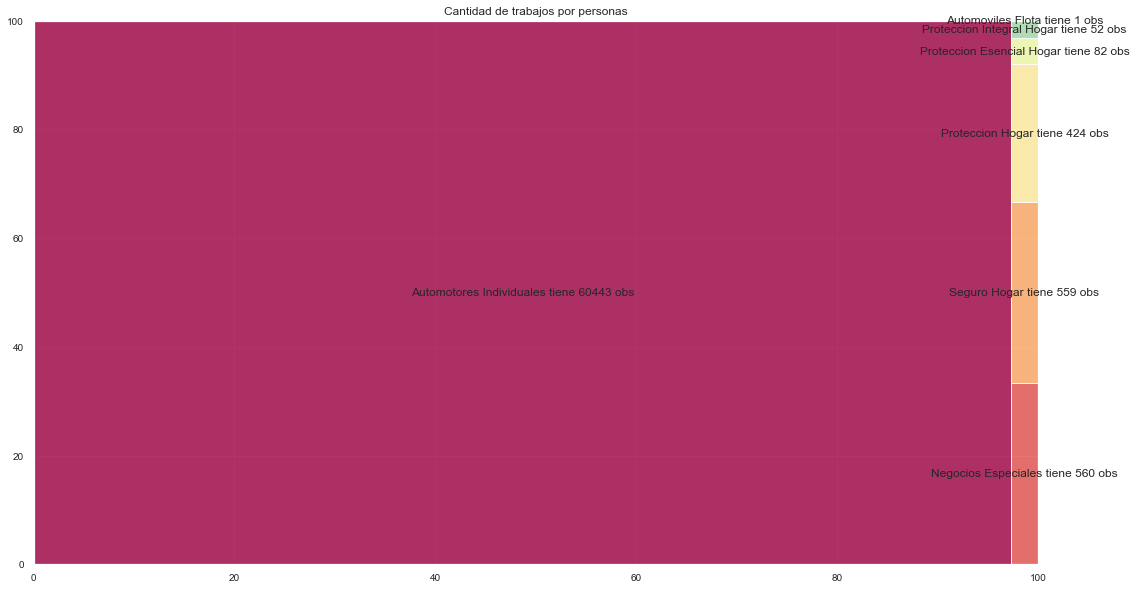

In [49]:
label_value = df["PRODUCT_NAME"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de trabajos por personas");

Me quedo con Automotores Individuales
(I stay with Individual Automotive)

In [51]:
df1 = df[df.PRODUCT_NAME  == "Automotores Individuales"]
del df

# Unit Type

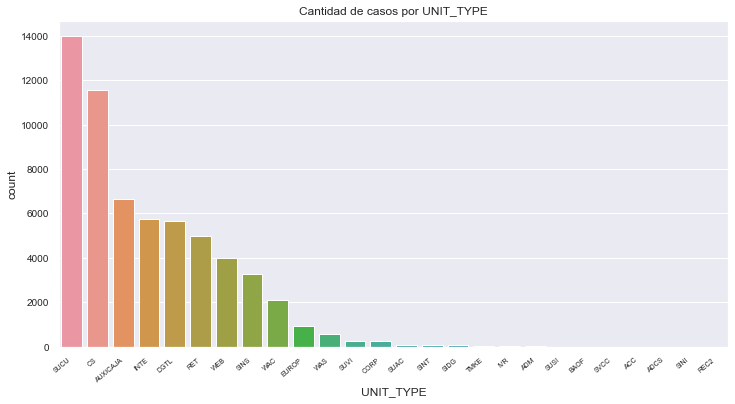

In [52]:
plt.rc('xtick', labelsize=24)     
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df1, x = 'UNIT_TYPE',
              order = df1['UNIT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=7, rotation=40, ha="right")

ax.set_title('Cantidad de casos por UNIT_TYPE')
plt.show()

In [53]:
df1["UNIT_TYPE"].value_counts().to_dict() 

{'SUCU': 13967,
 'CS': 11549,
 'AUXICAJA': 6668,
 'INTE': 5773,
 'DGTL': 5674,
 'RET': 4966,
 'WEB': 3990,
 'SINS': 3259,
 'WAC': 2106,
 'EUROP': 934,
 'WAS': 564,
 'SUVI': 275,
 'CORP': 255,
 'SUAC': 103,
 'SINT': 97,
 'SIDG': 74,
 'TMKE': 55,
 'IVR': 36,
 'ADM': 36,
 'SUSI': 19,
 'BAOF': 13,
 'SVCC': 13,
 'ACC': 7,
 'ADCS': 5,
 'SINI': 4,
 'REC2': 1}

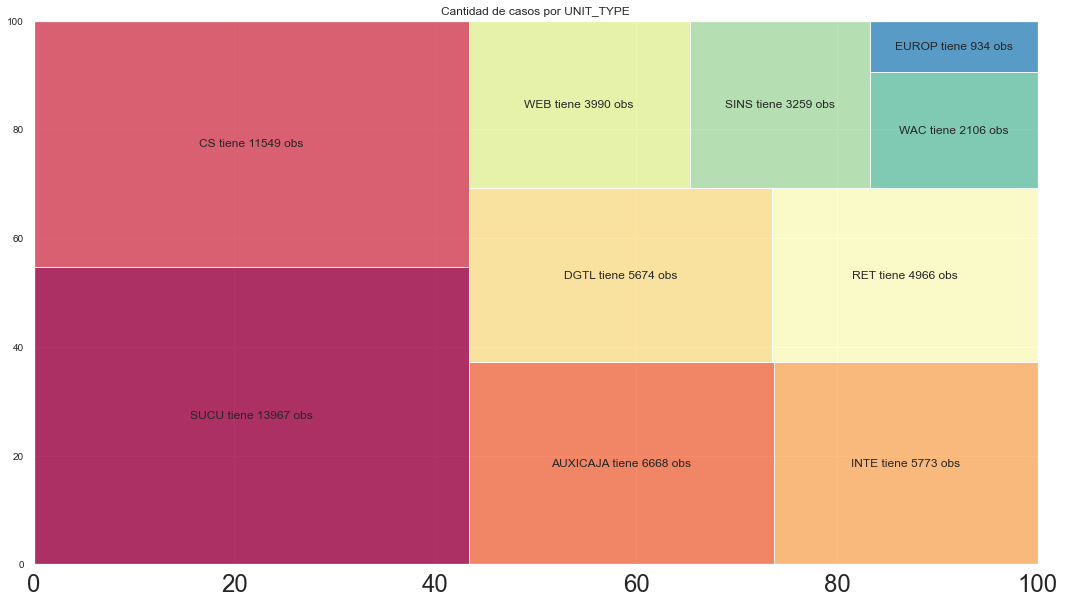

In [54]:
filtro = df1[df1['UNIT_TYPE'].map(df1['UNIT_TYPE'].value_counts()) > 900]
label_value = filtro["UNIT_TYPE"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de casos por UNIT_TYPE");

## % de Detractores por UNITY_TYPE

In [55]:
unit_typesegment = pd.crosstab(filtro['categoria'],filtro['UNIT_TYPE']).apply(lambda x: x/x.sum() * 100)
unit_typesegment = unit_typesegment.transpose() 
unit_typesegment = unit_typesegment.reset_index(level=0, inplace=False)
unit_typesegment


categoria,UNIT_TYPE,detractor,neutro,promotor
0,AUXICAJA,10.377924,17.096581,72.525495
1,CS,27.967789,21.387133,50.645077
2,DGTL,32.252379,22.506168,45.241452
3,EUROP,17.237687,20.449679,62.312634
4,INTE,8.314568,25.601940,66.083492
5,RET,19.452275,23.801853,56.745872
6,SINS,13.623811,17.888923,68.487266
7,SUCU,15.235913,21.801389,62.962698
8,WAC,11.965812,22.459639,65.574549
9,WEB,10.275689,24.360902,65.363409


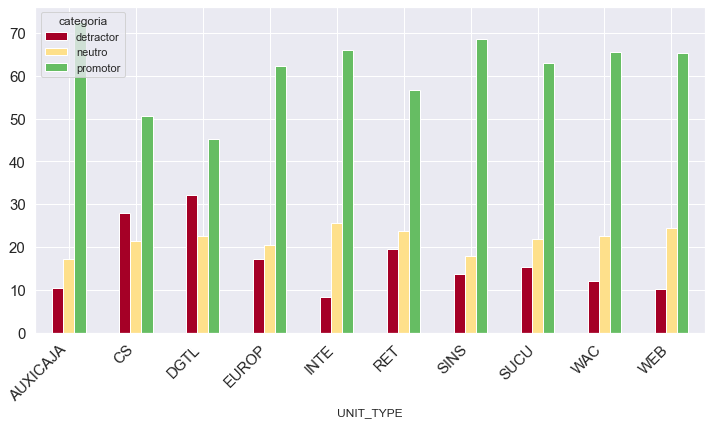

In [56]:
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
unit_typesegment.plot.bar(x="UNIT_TYPE",color=["#a50026", '#fee08b', '#66bd63'])
plt.xticks(rotation=45, ha='right');

## % de Detractores por TOUCHPOINT_NUMBER

In [57]:
cross_touchpoint = pd.crosstab(df1['categoria'],df1['TOUCHPOINT_NUMBER']).apply(lambda x: x/x.sum() * 100)
cross_touchpoint = cross_touchpoint.transpose() 
cross_touchpoint = cross_touchpoint.reset_index(level=0, inplace=False)
cross_touchpoint


categoria,TOUCHPOINT_NUMBER,detractor,neutro,promotor
0,AUXICAJA,13.402062,19.587629,67.010309
1,CENTRO DE RESOLUCION,100.000000,0.000000,0.000000
2,CSS BAHIA BLANCA,25.000000,25.000000,50.000000
3,CSS BERISSO,17.647059,17.647059,64.705882
4,CSS CATAMARCA,5.882353,17.647059,76.470588
5,CSS COMODORO RIVADAVIA,6.666667,26.666667,66.666667
6,CSS CONGRESO,16.666667,22.222222,61.111111
7,CSS CORRIENTES,6.666667,6.666667,86.666667
8,CSS FORMOSA,0.000000,11.111111,88.888889
9,CSS GENERAL ROCA,22.222222,33.333333,44.444444


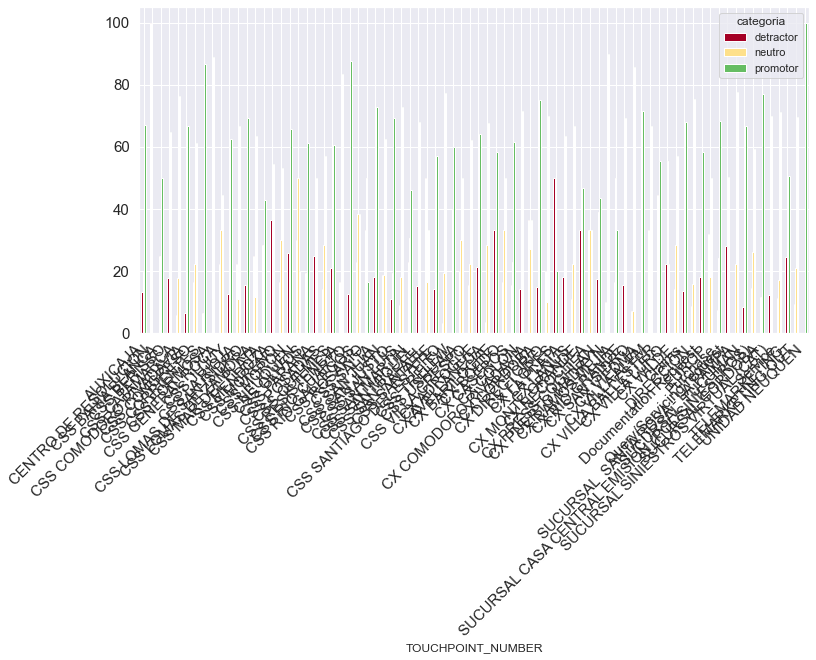

In [58]:
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
cross_touchpoint.plot.bar(x="TOUCHPOINT_NUMBER",color=["#a50026", '#fee08b', '#66bd63'])
plt.xticks(rotation=45, ha='right');


# Valor del cliente
## Puntaje por valor del cliente y touchpoint


In [74]:
pd.crosstab(df1.TOUCHPOINT_NUMBER , df1.CUSTOMER_VALUE, margins=True)

CUSTOMER_VALUE,1,2,3,All
TOUCHPOINT_NUMBER,,,,
AUXICAJA,206,562,8,776
CENTRO DE RESOLUCION,1,2,0,3
CSS BAHIA BLANCA,3,1,0,4
CSS BERISSO,8,9,0,17
CSS CATAMARCA,6,10,1,17
CSS COMODORO RIVADAVIA,5,10,0,15
CSS CONGRESO,13,5,0,18
CSS CORRIENTES,4,11,0,15
CSS FORMOSA,6,3,0,9


# Caracteristicas del cliente

Simple % sexo, edad.

R mapita de zona

In [75]:
df1.GENDER = df1.GENDER.fillna("unknown")

In [76]:
per_gender = pd.crosstab(df1['categoria'],df1['GENDER']).apply(lambda x: x/x.sum() * 100)
per_gender

GENDER,F,M,unknown
categoria,,,
detractor,17.131207,18.403118,23.465704
neutro,20.522350,22.330359,19.855596
promotor,62.346444,59.266523,56.678700


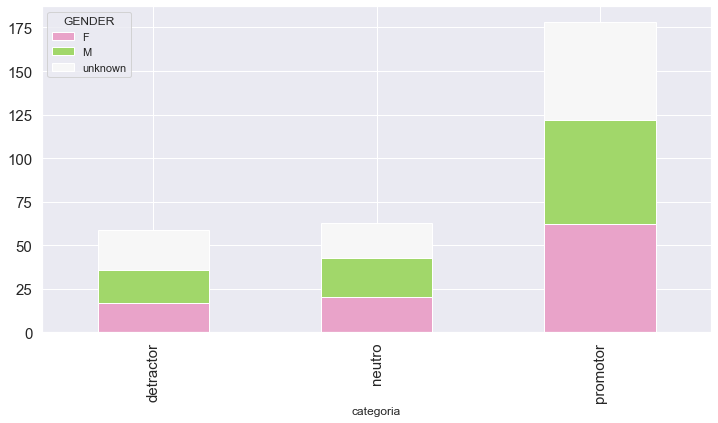

In [77]:
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
per_gender[['F','M',"unknown"]].plot(kind ='bar', stacked=True,color = ("#e9a3c9", "#a1d76a","#f7f7f7"))



## Edad

In [78]:
print('Edad Max: ', df1['AGE'].max())
print('Mediana de la edad: ', df1['AGE'].median())
print('Promedio de la edad: ', df1['AGE'].mean())
print('Edad Min: ', df1['AGE'].min())

Edad Max:  121.0
Mediana de la edad:  50.0
Promedio de la edad:  50.414919964761225
Edad Min:  1.0


In [79]:
len(df1.AGE[df1.AGE < 16])

20

In [80]:
df1 = df1[df1.AGE > 16]

Text(0.5, 1.0, 'Distribución de la edad en la muestra')

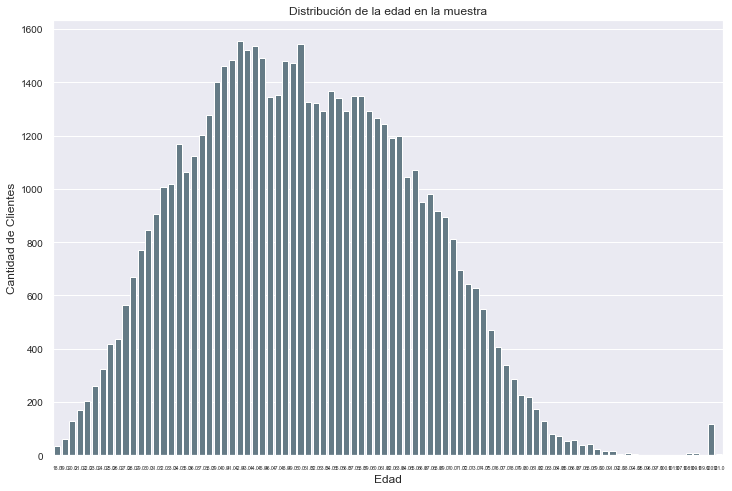

In [81]:
rcParams['figure.figsize'] = 12,8
sns.set()
plt.rc('xtick', labelsize=5)     
plt.rc('ytick', labelsize=10)
sns.countplot(x = 'AGE', data = df1,color = "#607d8b")
plt.xlabel("Edad") 
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de la edad en la muestra")  

In [82]:
paleta

['#66bd63', '#a50026', '#fee08b']

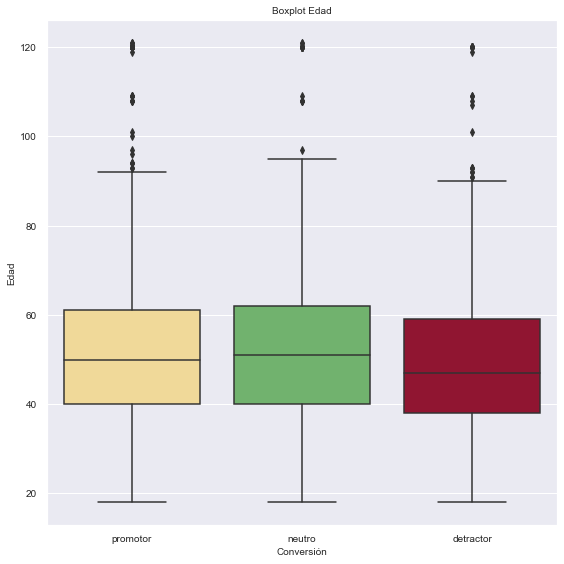

In [83]:
fig, (ax1) = plt.subplots( figsize = (8, 8))
sns.boxplot(y='AGE', x='categoria', data=df1, palette=['#fee08b','#66bd63', '#a50026', ], ax = ax1)
ax1.set_xlabel('Conversión', fontsize=10)
ax1.set_ylabel('Edad', fontsize=10)
ax1.set_title('Boxplot Edad', fontsize=10)
ax1.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

plt.tight_layout() 

In [84]:
lst = [df1]
for column in lst:
    column.loc[column["AGE"] < 30,  'grupo_edad'] = 20
    column.loc[(column["AGE"] >= 30) & (column["AGE"] <= 39), 'grupo_edad'] = 30
    column.loc[(column["AGE"] >= 40) & (column["AGE"] <= 49), 'grupo_edad'] = 40
    column.loc[(column["AGE"] >= 50) & (column["AGE"] <= 59), 'grupo_edad'] = 50
    column.loc[column["AGE"] >= 60, 'grupo_edad'] = 60

In [85]:
per_edad = pd.crosstab(df1['categoria'],df1['grupo_edad'])
per_edad = per_edad.T
per_edad

categoria,detractor,neutro,promotor
grupo_edad,,,
20.0,766,773,2509
30.0,2368,2251,6398
40.0,2833,3182,8684
50.0,2286,2969,8218
60.0,2567,3905,10432


In [86]:
per_edad

categoria,detractor,neutro,promotor
grupo_edad,,,
20.0,766,773,2509
30.0,2368,2251,6398
40.0,2833,3182,8684
50.0,2286,2969,8218
60.0,2567,3905,10432


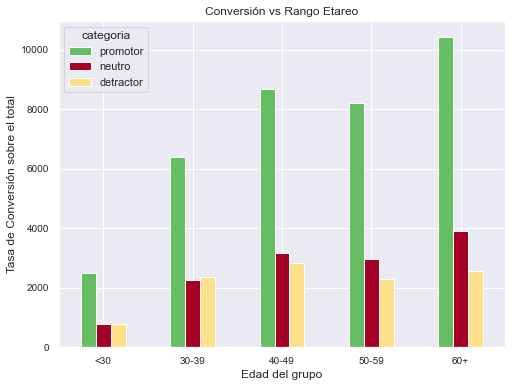

In [87]:
rcParams['figure.figsize'] = 8,6
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
sns.set_style("darkgrid")
plot_age = per_edad[["promotor","neutro", "detractor"]].plot(kind = 'bar',color = paleta)
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()

In [88]:

print("--- %s segundos---" % (time.time() - start_time))
playsound(sonido+"war.mp3")
gc.collect()



--- 716.1200823783875 segundos---


779